<a href="https://colab.research.google.com/github/shirleyzz/cap5610_machineleanrning/blob/master/Assignment2/HW2(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR10 data set

## Loading the CIFAR10 data set

In [0]:
import keras 
import numpy as np
from random import seed
from random import randrange
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers
from keras.callbacks import LearningRateScheduler
from keras.datasets import cifar10
import matplotlib.pyplot as plt

In [0]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

## Preprocessing

In [0]:
# train_images = train_images.reshape((50000, 32 * 32 * 3))
train_images = train_images.astype('float32') / 255
# test_images = test_images.reshape((10000, 32 * 32 * 3))
test_images = test_images.astype('float32') / 255
num_classes = 10
train_labels = keras.utils.to_categorical(train_labels,num_classes)
test_labels = keras.utils.to_categorical(test_labels,num_classes)

In [0]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
validation_datagen = ImageDataGenerator(rescale=1./255)

In [55]:
#network architecture 
network = Sequential()
network.add(Conv2D(32, (3, 3), padding='same',input_shape=training_images[0].shape))
network.add(Activation('softmax'))
network.add(Flatten())
network.add(Dense(512))
network.add(Activation('relu'))
network.add(Dropout(0.5))
network.add(Dense(10))
network.add(Activation('softmax'))
network.summary()
#compilation step
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
network.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
#train the model
epochs = 30

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_16 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               16777728  
_________________________________________________________________
activation_17 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                5130      
__________

In [0]:
#split into validation set and training set at the rate of 8:2
i = 40000
training_images = train_images[:i]
valid_images = train_images[:-i]
training_labels = train_labels[:i]
valid_labels = train_labels[:-i]
#
train_datagen.fit(training_images)
validation_datagen.fit(valid_images)

In [0]:
history = network.fit_generator(datagen.flow(training_images, training_labels,
                                     batch_size=128),
                        steps_per_epoch=100,
                        epochs=epochs,
                        validation_data=(valid_images, valid_labels),
                        validation_steps=50)

Epoch 1/30
100/100 [==============================] - 15s 152ms/step - loss: 2.3115 - acc: 0.1037 - val_loss: 2.3007 - val_acc: 0.1070
Epoch 2/30
 99/100 [============================>.] - ETA: 0s - loss: 2.3007 - acc: 0.1079

In [48]:
print(training_images.shape)
print(training_labels.shape)
print(valid_images.shape)
print(valid_labels.shape)

(40000, 32, 32, 3)
(40000, 10)
(10000, 32, 32, 3)
(10000, 10)


In [0]:
# training_images = np.array(training_images)
# training_labels = np.array(training_labels)
# valid_images = np.array(valid_images)
# valid_labels = np.array(valid_labels)

## Network1 

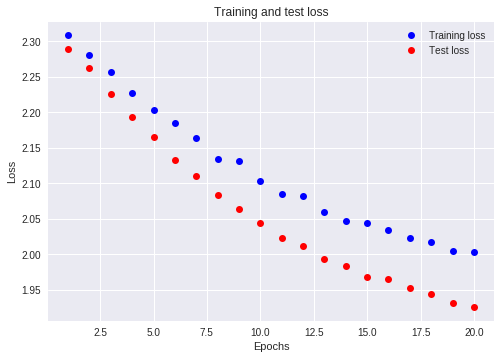

In [49]:
#display result
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

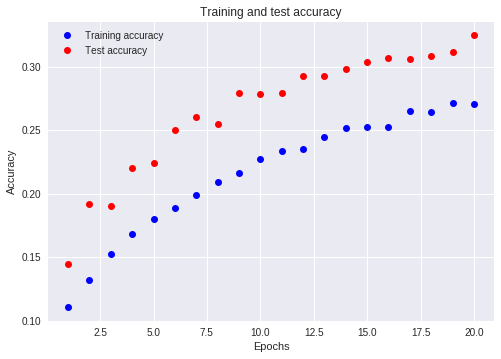

In [50]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Network2

In [0]:
#network architecture 
network = Sequential()
network.add(Conv2D(32, (3, 3), padding='same',input_shape=training_images.shape[1:]))
network.add(Activation('relu'))
network.add(Conv2D(32,(3,3)))
network.add(Activation('relu'))

network.add(Flatten())
network.add(Dense(512))
network.add(Activation('relu'))
network.add(Dropout(0.5))
network.add(Dense(10))
network.add(Activation('softmax'))
network.summary()

#compilation step
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
network.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
#train the model
epochs = 20
history = network.fit(training_images, 
                      training_labels, 
                      epochs=epochs, 
                      batch_size=128, 
                      validation_data=(valid_images, valid_labels))

In [0]:
#display training and test loss
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss(network2)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
#display training and test accuracy
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy(network2)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Network 3: using droplayer


In [0]:

from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()
# conv layers
# 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(2, 2))
# 2
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
# 3
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
# 4
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
# dense layers
model.add(layers.Flatten())
# DROPOUT
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()
# model.compile(
#     loss='binary_crossentropy', 
#     optimizer=optimizers.RMSprop(lr=1e-4), 
#     metrics=['acc'])
# #compilation step
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
network.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
#train the model
epochs = 20
history = network.fit(training_images, 
                      training_labels, 
                      epochs=epochs, 
                      batch_size=128, 
                      validation_data=(valid_images, valid_labels))

In [0]:
#display training and test loss
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss(network3)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
#display training and test accuracy
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy(network3)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#compare woth K fold

In [0]:
def k_fold_cross_split(data,folds):
  new_data = list(data)
  fold_size = int(data.shape[0]/folds)
  dataset_split = []
  for i in range(folds):
    fold = []
    for j in range(fold_size):
      index = randrange(len(new_data))
      fold.append(new_data.pop(index))
    dataset_split.append(fold)
  return dataset_split
#split train into training and validation
seed(1)
num_folds = 6
training_images = []
training_labels = []
folds_all = k_fold_cross_split(train_images, num_folds)
folds_all_label = k_fold_cross_split(train_labels,num_folds)
folds_all = np.array(folds_all)
folds_all_label = np.array(folds_all_label)

In [0]:
training_images = np.concatenate((folds_all[0],folds_all[1],folds_all[2],folds_all[3],folds_all[4]))
training_labels = np.concatenate((folds_all_label[0],folds_all_label[1],folds_all_label[2],folds_all_label[3],folds_all_label[4]))
valid_images = folds_all[num_folds-1]
valid_labels = folds_all_label[num_folds-1]

In [0]:
#network architecture 
network = Sequential()
network.add(Conv2D(32, (3, 3), padding='same',input_shape=training_images[0].shape))
network.add(Activation('softmax'))
network.add(Flatten())
network.add(Dense(512))
network.add(Activation('relu'))
network.add(Dropout(0.5))
network.add(Dense(10))
network.add(Activation('softmax'))
network.summary()
#compilation step
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
network.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
#train the model
epochs = 20
history = network.fit(training_images, 
                      training_labels, 
                      epochs=epochs, 
                      batch_size=128, 
                      validation_data=(valid_images, valid_labels))

In [0]:
#display result
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()